In [193]:
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
palette=['#ff3b30', '#007aff', '#4cd964','#ffcc00', '#5856d6']
markers=['o', '^', '<', '>', "1","2"]
sns.set_style("ticks")
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 8
rc("font", **{'family':'serif','serif':['Palatino Linotype'], 'size':15})
import glob
import os
import ast
import pandas as pd
from tqdm import tqdm

In [194]:
MAX=7200
def read_from_file(fname):
    if not os.path.exists(fname):
        return MAX
    with open(fname,'r') as fr:
        try:
            time_used=fr.read().split("\n")[-1].split(" ")[-1]
            return float(time_used)
        except:
            print(fname)
            return MAX
    

In [195]:
basepath = "../weighted_sample/rand-k-sat/"
all_data = []
all_labels = []
xaxis = []
baselines = ['nelson','waps','weightgen','xor_sampling']
new_name_baselines = ['Nelson (ours)','WAPS','WeightGen', 'XORSampling']
# try:
for size in range(10, 1500, 10):
        subcase = "5_{}_{}".format(size, size)
        for i in range(1, 100):
            fid = str(i).zfill(4)
            for bi in range(len(baselines)):
                if not os.path.exists(os.path.join(basepath, subcase)):
                    continue
                filename = os.path.join(basepath, subcase, "randkcnf_" + subcase + "_" + fid + "." + baselines[bi] + ".log")
                time_used = read_from_file(filename)
                all_data.append(time_used)
                all_labels.append(new_name_baselines[bi])
                xaxis.append(size)


../weighted_sample/rand-k-sat/5_10_10/randkcnf_5_10_10_0032.weightgen.log
../weighted_sample/rand-k-sat/5_10_10/randkcnf_5_10_10_0051.weightgen.log
../weighted_sample/rand-k-sat/5_20_20/randkcnf_5_20_20_0001.weightgen.log
../weighted_sample/rand-k-sat/5_20_20/randkcnf_5_20_20_0002.weightgen.log
../weighted_sample/rand-k-sat/5_20_20/randkcnf_5_20_20_0003.weightgen.log
../weighted_sample/rand-k-sat/5_20_20/randkcnf_5_20_20_0004.weightgen.log
../weighted_sample/rand-k-sat/5_20_20/randkcnf_5_20_20_0005.weightgen.log
../weighted_sample/rand-k-sat/5_20_20/randkcnf_5_20_20_0006.weightgen.log
../weighted_sample/rand-k-sat/5_20_20/randkcnf_5_20_20_0007.weightgen.log
../weighted_sample/rand-k-sat/5_20_20/randkcnf_5_20_20_0009.weightgen.log
../weighted_sample/rand-k-sat/5_50_50/randkcnf_5_50_50_0001.weightgen.log
../weighted_sample/rand-k-sat/5_50_50/randkcnf_5_50_50_0002.waps.log
../weighted_sample/rand-k-sat/5_50_50/randkcnf_5_50_50_0004.waps.log
../weighted_sample/rand-k-sat/5_50_50/randkcnf_5

11088


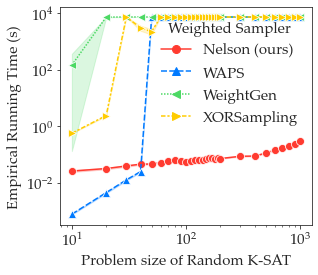

In [200]:
df = pd.DataFrame({
    "Empirical Running Time (s)": all_data,
    "Problem size of Random K-SAT": xaxis,
    "Weighted Sampler": all_labels,
})

print(len(df))
plt.figure(figsize=(4.5,4))
ax = sns.lineplot(data=df, x="Problem size of Random K-SAT", y="Empirical Running Time (s)", hue='Weighted Sampler',
                  style='Weighted Sampler', alpha=1, palette=palette[:4], markers=markers[:4])

ax.set(yscale="log", xscale="log")
sns.move_legend(ax, "upper right",  frameon=False)

fname = os.path.join(basepath, "sampling.randkcnf.weighted.pdf")
plt.savefig(fname, bbox_inches='tight', pad_inches=0)

In [153]:
os.getcwd()

'/home/jiangnan/PycharmProjects/partial-rejection-sampling/results/plots'